# DebyeBenchmarker 
In this notebook, we'll demonstrate how to use the DebyeBenchmarker class to benchmark nanoparticle generation and Debye calculations on your machine.

In [27]:
# Import necessary modules and functions
from debyecalculator.utility.benchmark import DebyeBenchmarker, to_csv, from_csv

# Set up a DebyeBenchmarker instance
radii_to_benchmark = [2, 4, 6, 8, 10, 12, 14, 16]
benchmarker = DebyeBenchmarker(radii=radii_to_benchmark)

# Make folder for benchmarking CSVs
import os
if not os.path.exists('benchmarks/'):
    os.mkdir('benchmarks')

### 1. Benchmarking Nanoparticle Generation
Let's start by benchmarking the nanoparticle generation process. The `benchmark_generation` method provides the flexibility to generate nanoparticles individually or all at once. Setting the `individually` parameter to `True` generates structures one at a time. However, note that the function is generally more efficient when all structures are generated at the same time. If `individually == True`, times and memory will be displayed as the means across structures. The `repetitions` parameter controls the number of repetitions for the benchmark. We'll then display the generated statistics table and save it to a CSV file.

In [28]:
# Benchmark nanoparticle generation (Individually) and display statistics
generation_stats_ind = benchmarker.benchmark_generation(individually=True, repetitions=3)
print('Generation statistics (individually):')
print(generation_stats_ind)

# Benchmark nanoparticle generation and display statistics
generation_stats_aao = benchmarker.benchmark_generation(individually=False, repetitions=3)
print('Generation statistics (all-at-ones):')
print(generation_stats_aao)

# Save statistics to a CSV file
csv_generation_path = 'benchmarks/generation_stats_ind.csv'
to_csv(generation_stats_ind, csv_generation_path)

Benchmarking Nanoparticle Generation...:   0%|          | 0/8 [00:00<?, ?it/s]

Generation statistics (individually):
+------------------------------------------------------------------------+
|             Benchmark Generator / cuda / Batch Size: 10000             |
+------------+------------+----------+---------+-------------------------+
| Radius [Å] | Num. atoms | Mean [s] | Std [s] | MaxAlloc. CUDA mem [MB] |
+------------+------------+----------+---------+-------------------------+
|        2.0 |          5 |  0.19221 | 0.06367 |                14.19459 |
|        4.0 |         47 |  0.15843 | 0.00699 |                14.07724 |
|        6.0 |        161 |  0.15699 | 0.00649 |                14.07949 |
|        8.0 |        287 |  0.21756 | 0.00657 |                70.39171 |
|       10.0 |        473 |  0.25752 | 0.08312 |                70.39601 |
|       12.0 |        845 |  0.31275 | 0.00555 |               349.87141 |
|       14.0 |       1367 |  0.30408 | 0.00523 |               349.88339 |
|       16.0 |       2045 |  0.33158 | 0.05967 |              

### 2. Benchmark Calculator
Next, we'll benchmark the Debye calculator using the `benchmark_calculator` method of the `DebyeBenchmarker` class. This will provide statistics for Debye calculations on nanoparticles of different radii.

In [36]:
# Benchmark Debye calculator and display statistics (CPU)
benchmarker.set_device('cpu')
calculator_stats_cpu = benchmarker.benchmark_calculator(repetitions=3)
print(calculator_stats_cpu)

# Save statistics to a CSV file
csv_calculator_path_cpu = 'benchmarks/calculator_stats_cpu.csv'
to_csv(calculator_stats_cpu, csv_calculator_path_cpu)

# ---

# Benchmark Debye calculator and display statistics (CUDA), Batch size 10000
benchmarker.set_device('cuda')
benchmarker.set_batch_size(10000)
calculator_stats_cuda_10k = benchmarker.benchmark_calculator(repetitions=3)
print(calculator_stats_cuda)

# Save statistics to a CSV file
csv_calculator_path_cuda_10k = 'benchmarks/calculator_stats_cuda_10k.csv'
to_csv(calculator_stats_cuda_10k, csv_calculator_path_cuda_10k)

# ---

# Benchmark Debye calculator and display statistics (CUDA), Batch size: 100
benchmarker.set_device('cuda')
benchmarker.set_batch_size(100)
calculator_stats_cuda_100 = benchmarker.benchmark_calculator(repetitions=3)
print(calculator_stats_cuda_100)

# Save statistics to a CSV file
csv_calculator_path_cuda_100 = 'benchmarks/calculator_stats_cuda.csv'
to_csv(calculator_stats_cuda_100, csv_calculator_path_cuda_100)

Benchmarking Calculator...:   0%|          | 0/8 [00:00<?, ?it/s]

+------------------------------------------------------------------------+
|             Benchmark Generator / cpu / Batch Size: 10000              |
+------------+------------+----------+---------+-------------------------+
| Radius [Å] | Num. atoms | Mean [s] | Std [s] | MaxAlloc. CUDA mem [MB] |
+------------+------------+----------+---------+-------------------------+
|        2.0 |          5 |  0.00149 | 0.00014 |                 0.00000 |
|        4.0 |         47 |  0.00489 | 0.00038 |                 0.00000 |
|        6.0 |        161 |  0.04241 | 0.00277 |                 0.00000 |
|        8.0 |        287 |  0.12499 | 0.00249 |                 0.00000 |
|       10.0 |        473 |  0.33603 | 0.00988 |                 0.00000 |
|       12.0 |        845 |  1.05047 | 0.02478 |                 0.00000 |
|       14.0 |       1367 |  2.74108 | 0.02966 |                 0.00000 |
|       16.0 |       2045 |  5.99301 | 0.05980 |                 0.00000 |
+------------+-----------

Benchmarking Calculator...:   0%|          | 0/8 [00:00<?, ?it/s]

+------------------------------------------------------------------------+
|             Benchmark Generator / cuda / Batch Size: 10000             |
+------------+------------+----------+---------+-------------------------+
| Radius [Å] | Num. atoms | Mean [s] | Std [s] | MaxAlloc. CUDA mem [MB] |
+------------+------------+----------+---------+-------------------------+
|        2.0 |          5 |  0.00171 | 0.00024 |                18.93530 |
|        4.0 |         47 |  0.00181 | 0.00003 |                23.55507 |
|        6.0 |        161 |  0.00501 | 0.00007 |               101.93101 |
|        8.0 |        287 |  0.01243 | 0.00003 |               125.65709 |
|       10.0 |        473 |  0.03175 | 0.00112 |               127.64672 |
|       12.0 |        845 |  0.09515 | 0.00031 |               132.91418 |
|       14.0 |       1367 |  0.25062 | 0.00130 |               143.53562 |
|       16.0 |       2045 |  0.61683 | 0.01725 |               166.67802 |
+------------+-----------

Benchmarking Calculator...:   0%|          | 0/8 [00:00<?, ?it/s]

+------------------------------------------------------------------------+
|              Benchmark Generator / cuda / Batch Size: 100              |
+------------+------------+----------+---------+-------------------------+
| Radius [Å] | Num. atoms | Mean [s] | Std [s] | MaxAlloc. CUDA mem [MB] |
+------------+------------+----------+---------+-------------------------+
|        2.0 |          5 |  0.00158 | 0.00009 |                18.93530 |
|        4.0 |         47 |  0.00698 | 0.00079 |                19.28653 |
|        6.0 |        161 |  0.05525 | 0.00016 |                19.52000 |
|        8.0 |        287 |  0.18138 | 0.01785 |                19.90502 |
|       10.0 |        473 |  0.62424 | 0.02804 |                21.83424 |
|       12.0 |        845 |  1.94306 | 0.03185 |                26.57741 |
|       14.0 |       1367 |  4.94448 | 0.10086 |                37.06470 |
|       16.0 |       2045 | 11.67121 | 0.25772 |                60.34125 |
+------------+-----------

### 3. Load and Display Statistics from CSV
Now, let's load the statistics from the CSV files we saved earlier and display the tables.

In [37]:
# Load statistics from the CSV files and display them
loaded_stats_cpu = from_csv(csv_calculator_path_cpu)
loaded_stats_cuda_10k = from_csv(csv_calculator_path_cuda_10k)
loaded_stats_cuda_100 = from_csv(csv_calculator_path_cuda_100)

print("\nLoaded Calculator Statistics CPU:")
print(loaded_stats_cpu)

print("\nLoaded Calculator Statistics CUDA (batch size 10k):")
print(loaded_stats_cuda_10k)

print("\nLoaded Calculator Statistics CUDA (batch size 100):")
print(loaded_stats_cuda_100)


Loaded Calculator Statistics CPU:
+------------------------------------------------------------------------+
|             Benchmark Generator /  cpu / Batch Size: 10000             |
+------------+------------+----------+---------+-------------------------+
| Radius [Å] | Num. atoms | Mean [s] | Std [s] | MaxAlloc. CUDA mem [MB] |
+------------+------------+----------+---------+-------------------------+
|        2.0 |          5 |  0.00149 | 0.00014 |                 0.00000 |
|        4.0 |         47 |  0.00489 | 0.00038 |                 0.00000 |
|        6.0 |        161 |  0.04241 | 0.00277 |                 0.00000 |
|        8.0 |        287 |  0.12499 | 0.00249 |                 0.00000 |
|       10.0 |        473 |  0.33603 | 0.00988 |                 0.00000 |
|       12.0 |        845 |  1.05047 | 0.02478 |                 0.00000 |
|       14.0 |       1367 |  2.74108 | 0.02966 |                 0.00000 |
|       16.0 |       2045 |  5.99301 | 0.05980 |                 

### Plot the results

In [31]:
# Import necessary modules
import matplotlib.pyplot as plt

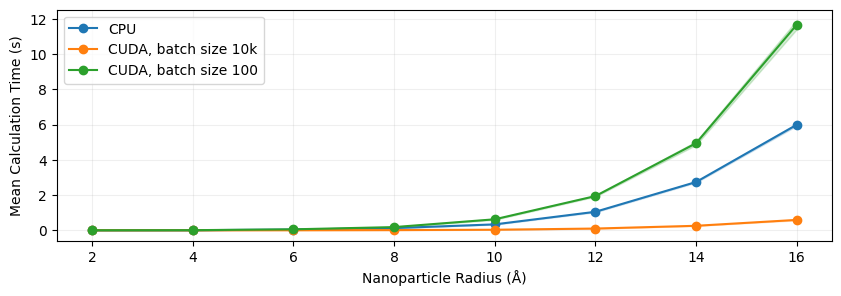

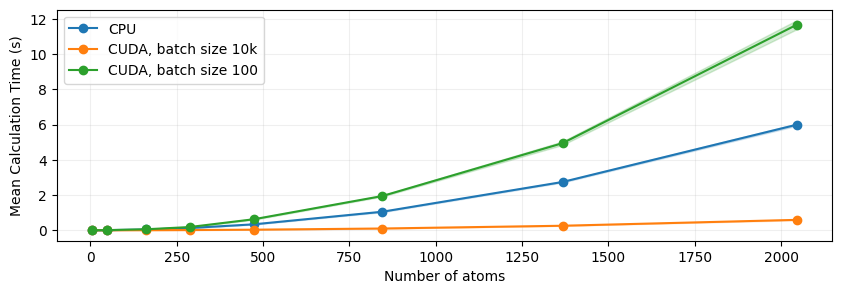

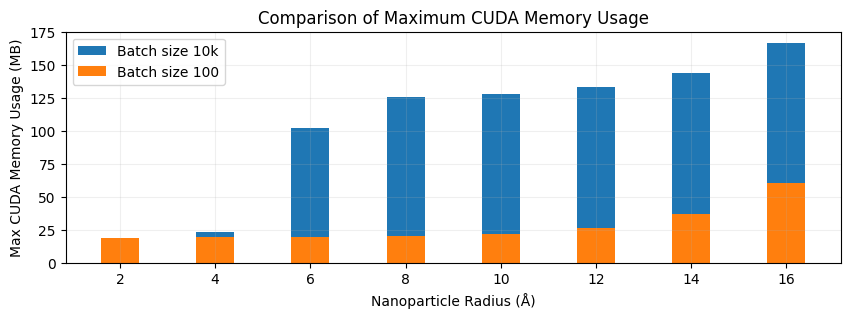

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Section 5: Plotting Benchmark Results

## 5.1 Plotting Calculation Time Trends

# Plot calculation time trends for CPU and CUDA
plt.figure(figsize=(10, 3))
plt.xlabel('Nanoparticle Radius (Å)')
plt.ylabel('Mean Calculation Time (s)')

# Extract data for plotting
means_cpu = np.array(loaded_stats_cpu.means)
stds_cpu = np.array(loaded_stats_cpu.stds)
means_cuda_10k = np.array(loaded_stats_cuda_10k.means)
stds_cuda_10k = np.array(loaded_stats_cuda_10k.stds)
means_cuda_100 = np.array(loaded_stats_cuda_100.means)
stds_cuda_100 = np.array(loaded_stats_cuda_100.stds)

# Plotting trends
p = plt.plot(loaded_stats_cpu.radii, means_cpu, label='CPU', marker='o')
plt.fill_between(loaded_stats_cpu.radii, means_cpu - stds_cpu, means_cpu + stds_cpu, color=p[0].get_color(), alpha=0.2)

p = plt.plot(loaded_stats_cuda_10k.radii, means_cuda_10k, label='CUDA, batch size 10k', marker='o')
plt.fill_between(loaded_stats_cuda_10k.radii, means_cuda_10k - stds_cuda_10k, means_cuda_10k + stds_cuda_10k, color=p[0].get_color(), alpha=0.2)

p = plt.plot(loaded_stats_cuda_10k.radii, means_cuda_100, label='CUDA, batch size 100', marker='o')
plt.fill_between(loaded_stats_cuda_10k.radii, means_cuda_100 - stds_cuda_100, means_cuda_100 + stds_cuda_100, color=p[0].get_color(), alpha=0.2)

plt.legend()
plt.grid(alpha=0.2)
plt.show()

plt.figure(figsize=(10, 3))
plt.xlabel('Number of atoms')
plt.ylabel('Mean Calculation Time (s)')

# Plotting trends
p = plt.plot(loaded_stats_cpu.num_atoms, means_cpu, label='CPU', marker='o')
plt.fill_between(loaded_stats_cpu.num_atoms, means_cpu - stds_cpu, means_cpu + stds_cpu, color=p[0].get_color(), alpha=0.2)

p = plt.plot(loaded_stats_cuda_10k.num_atoms, means_cuda_10k, label='CUDA, batch size 10k', marker='o')
plt.fill_between(loaded_stats_cuda_10k.num_atoms, means_cuda_10k - stds_cuda_10k, means_cuda_10k + stds_cuda_10k, color=p[0].get_color(), alpha=0.2)

p = plt.plot(loaded_stats_cuda_10k.num_atoms, means_cuda_100, label='CUDA, batch size 100', marker='o')
plt.fill_between(loaded_stats_cuda_10k.num_atoms, means_cuda_100 - stds_cuda_100, means_cuda_100 + stds_cuda_100, color=p[0].get_color(), alpha=0.2)

plt.legend()
plt.grid(alpha=0.2)
plt.show()

## 5.3 Comparing Maximum CUDA Memory Usage

# Bar plot comparing maximum CUDA memory usage
plt.figure(figsize=(10, 3))
plt.title('Comparison of Maximum CUDA Memory Usage')
plt.xlabel('Nanoparticle Radius (Å)')
plt.ylabel('Max CUDA Memory Usage (MB)')

# Extract data for plotting
cuda_mem_max_10k = loaded_stats_cuda_10k.cuda_mem
cuda_mem_max_100 = loaded_stats_cuda_100.cuda_mem

# Plotting comparison
plt.bar(loaded_stats_cuda_10k.radii, cuda_mem_max_10k, label='Batch size 10k')
plt.bar(loaded_stats_cuda_100.radii, cuda_mem_max_100, label='Batch size 100')
plt.legend()
plt.grid(alpha=0.2)
plt.show()
